# Installation

- `conda install seaborn`
- `pip install seaborn`

## offical website
- [seaborn](https://seaborn.pydata.org/)

you can go there and have a look at the documentation to know what it can do

its very easy and efficient with pandas and matplotlib

# what is seaborn ?
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It is built on top of matplotlib and closely integrated with pandas data structures.

In [1]:
# importing seaborn 
import seaborn as sns

Seaborn comes with some built in `datasets` and `themes`.

In [2]:
# loading dataset
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distplot

Distplot is a `histogram` and `kernel density estimation` plot. It is used to visualize the distribution of data. It takes as input an array and plots a `curve` corresponding to the `distribution of points` in the array.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='total_bill', ylabel='Count'>

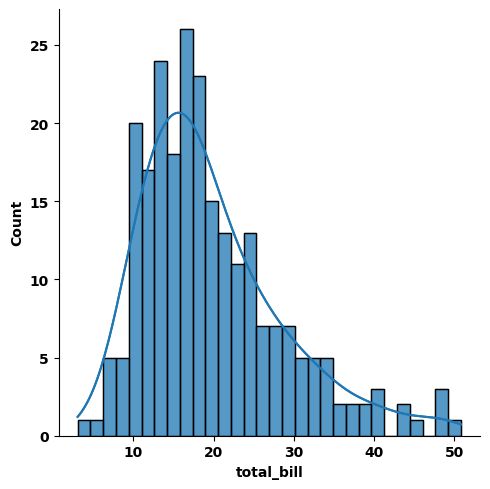

In [4]:
sns.displot(tips['total_bill'], kde=True, bins=30) # kde = kernel density estimation and histogram
#or
sns.histplot(tips['total_bill'], kde=True, bins=30) # kde = kernel density estimation and histogram

# Jointplot
Jointplot is used to visualize the relationship between two variables. It basically plots two distplots for bivariate data. It also shows the `pearson correlation coefficient` between the two variables.

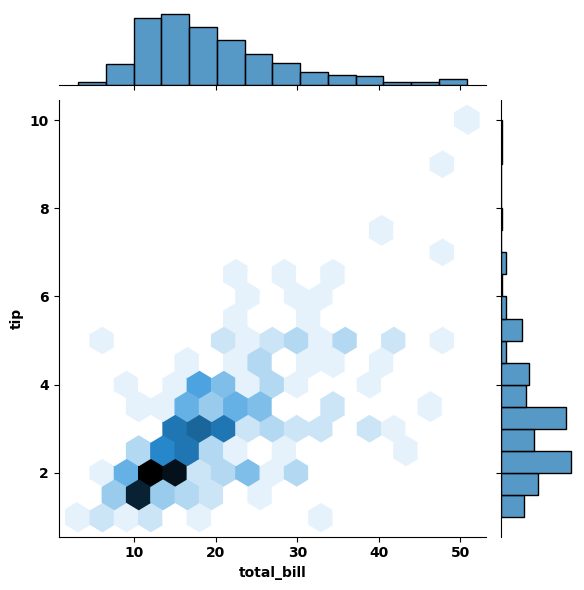

In [5]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') # hex = hexagonal

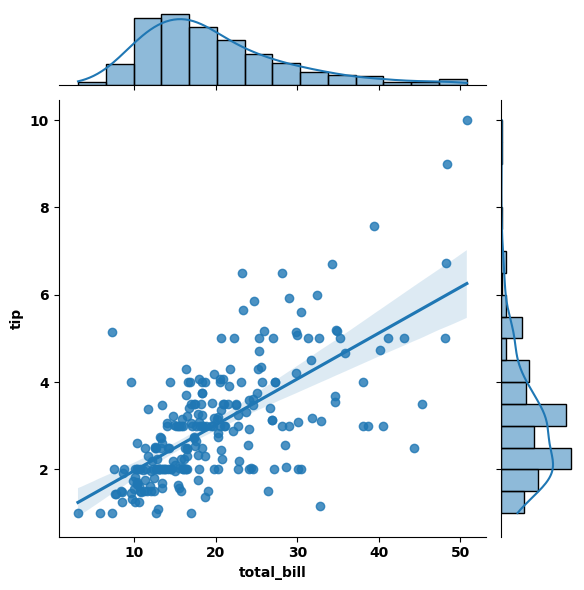

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')   # reg = regression

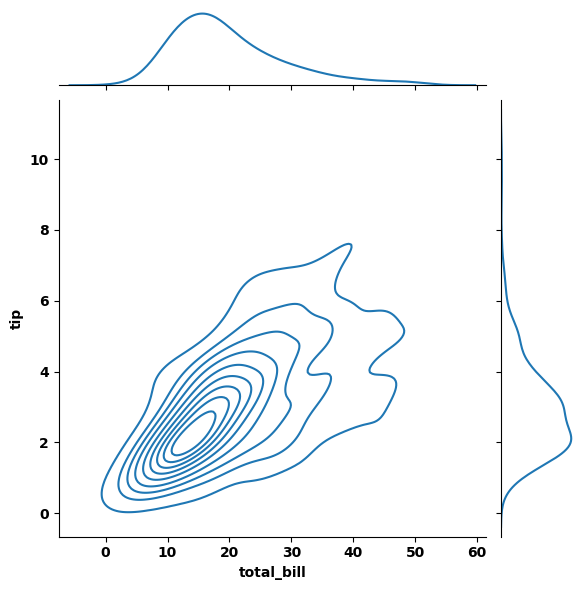

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')   # kde = kernel density estimation

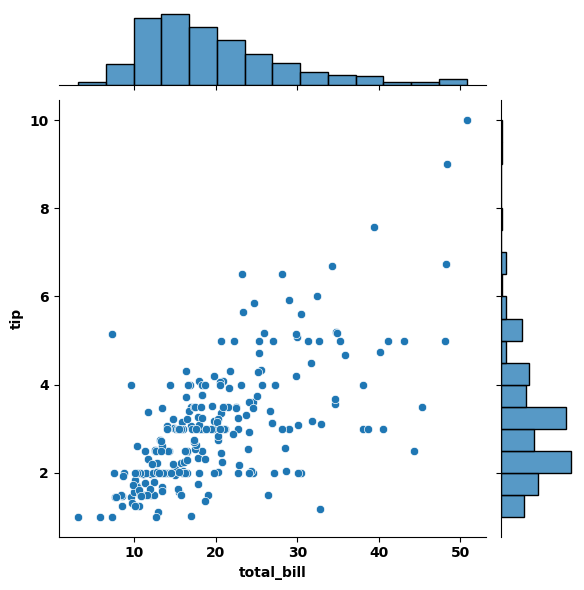

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips,) # default scatter

# Pairplot
`Pairplot` is used to visualize the pairwise relationships between the variables.  It plots the `scatterplot` between every two variables in the dataset and also the `distribution` of each variable in the diagonal axes. It is also called a `scatterplot matrix`.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


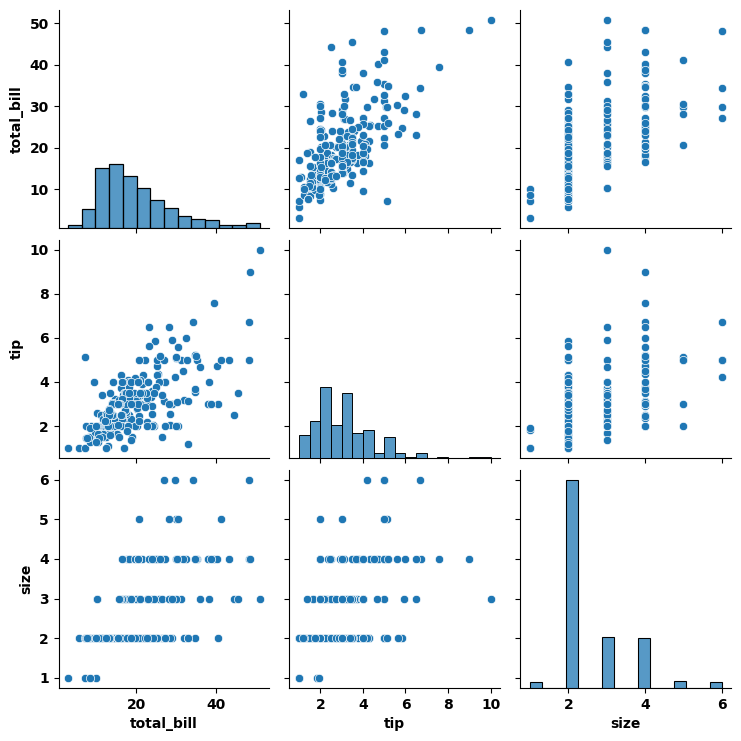

In [9]:
sns.pairplot(tips) # pairplot

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


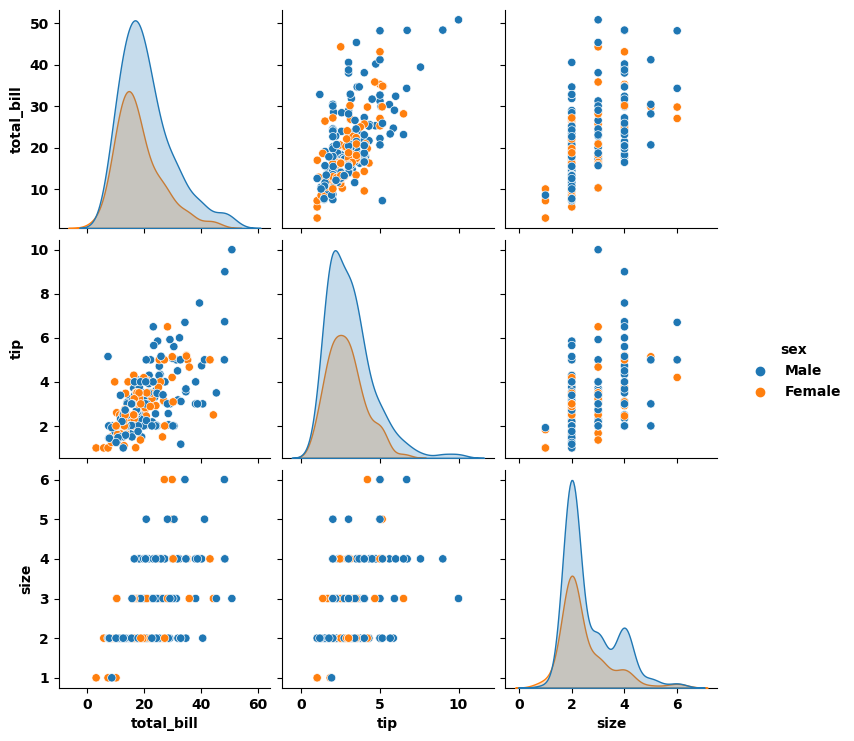

In [10]:
#we can catagorize the data by adding hue
sns.pairplot(tips, hue='sex') # pairplot

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


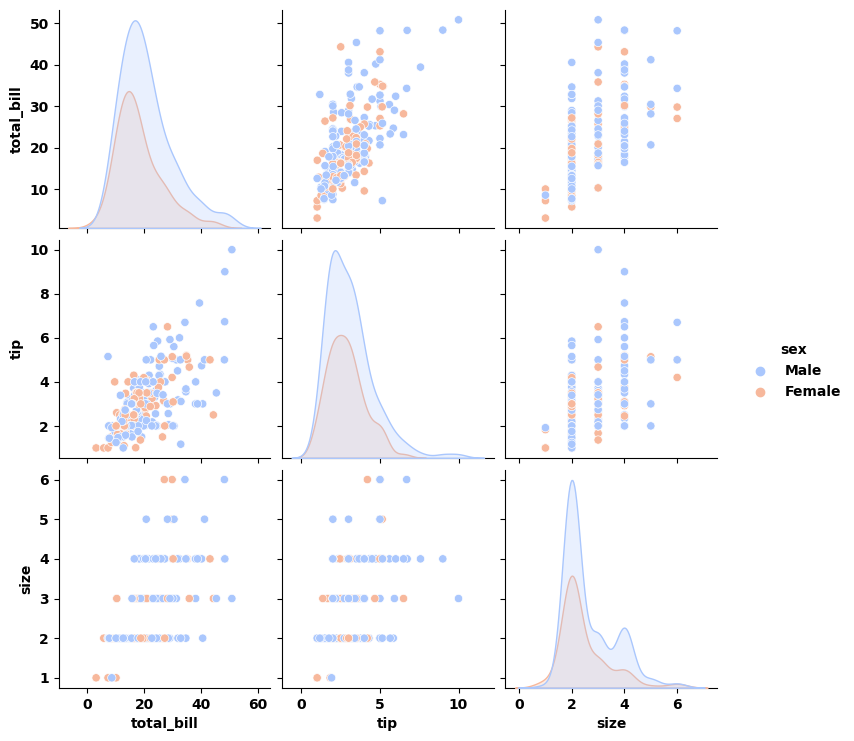

In [11]:
#we can also pass a colore palette to the plot
sns.pairplot(tips, hue='sex', palette='coolwarm') # pairplot

# Rugplot
`Rugplot` is used to visualize the `distribution` of a variable. It draws a dash mark for every point on a univariate distribution. It is the building block of a `kdeplot`. It is also called a `strip plot`.

<Axes: xlabel='total_bill'>

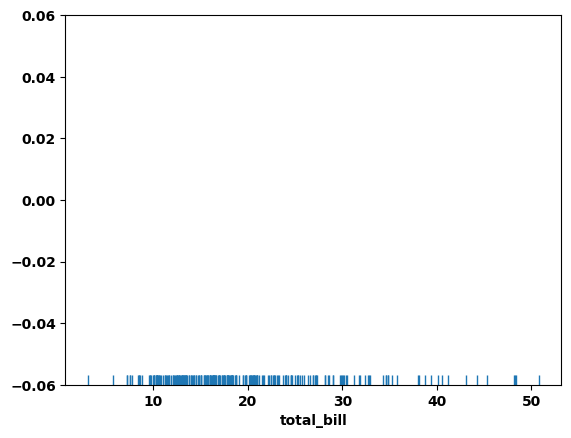

In [12]:
sns.rugplot(tips['total_bill']) # rugplot

A `rugplot` Has some `similarities` with a `histplot` and `kdeplot`. It is a `univariate` plot and it shows the `distribution` of a variable. It is a `1D` representation of a `2D` distribution.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


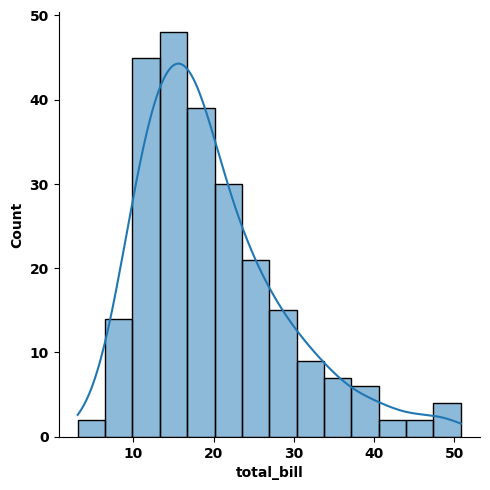

In [13]:
sns.displot(tips['total_bill'], kde=True) # kdeplot

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

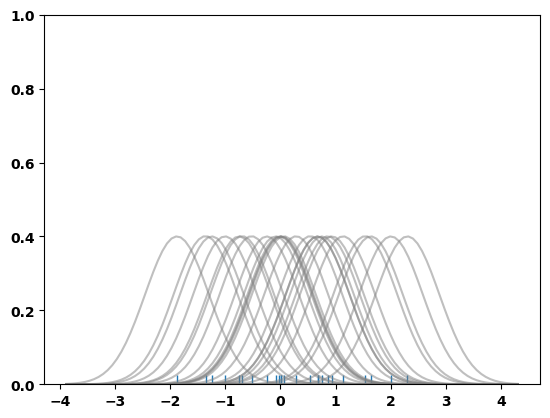

In [14]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

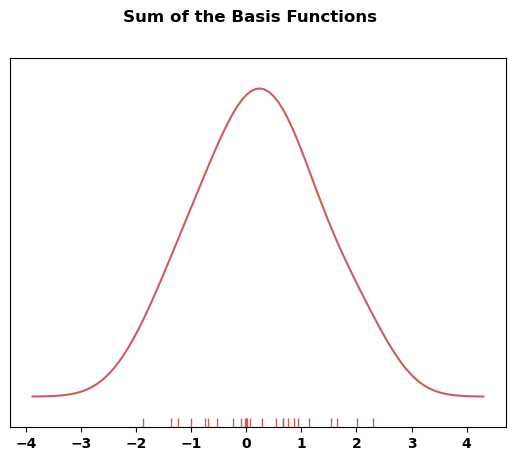

In [15]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

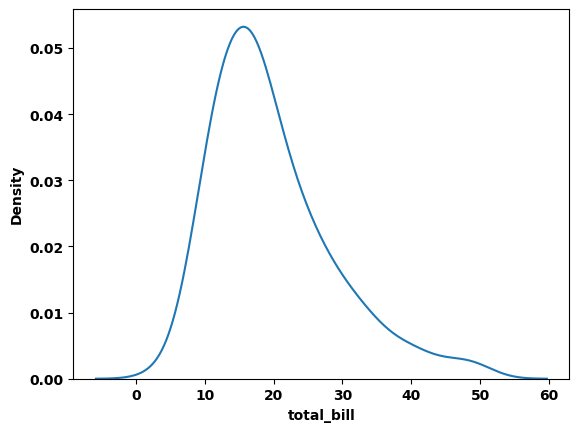

In [16]:
sns.kdeplot(tips['total_bill'])

# Categorical plots

In [17]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# barplot
A `barplot` is a `graph` that shows the `value_counts` of a `categorical` variable. It is a `2D` representation of a `1D` distribution. It is also called a `countplot`. It is the `categorical` equivalent of a `histogram`.

it takes some arguments:
- `x` : the `categorical` variable
- `y` : the `numerical` variable

- `data` : the dataset
etc..

<Axes: xlabel='sex', ylabel='total_bill'>

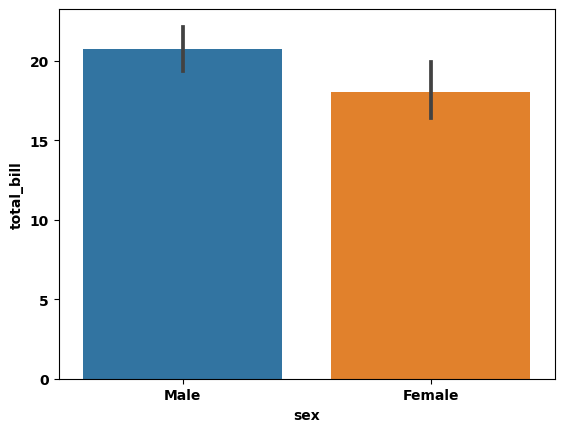

In [19]:
sns.barplot(x='sex', y='total_bill', data=tips)

we can use a agragate function to get the in different categories

<Axes: xlabel='sex', ylabel='total_bill'>

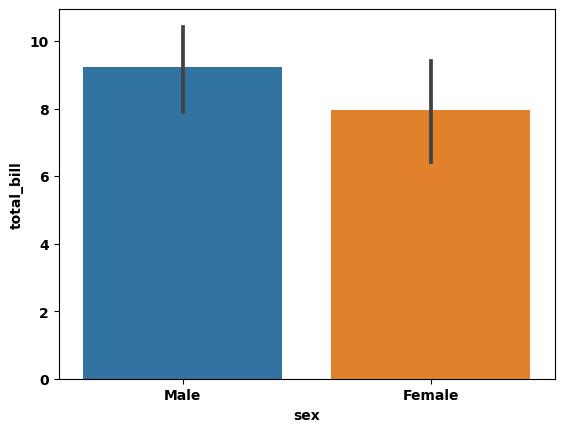

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

# Countplot
`Countplot` is the `categorical` equivalent of a `histogram`. It is used to visualize the `value_counts` of a `categorical` variable. It is a `barplot` but the `y` axis is `count` instead of `freq`. 

<Axes: xlabel='sex', ylabel='count'>

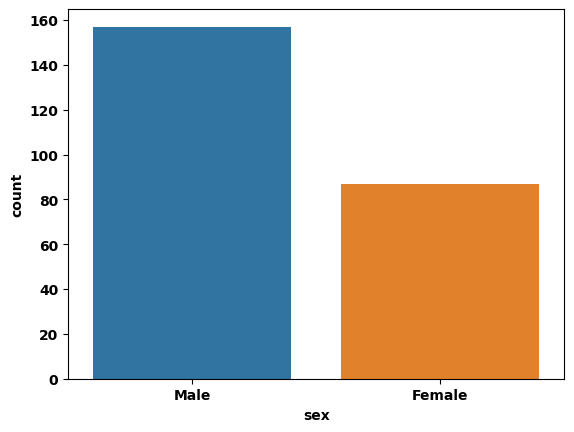

In [21]:
sns.countplot(x='sex', data=tips)

# boxplot 

`boxplot` gives a `summary` of the `distribution` of a `numerical` variable. Meaning it shows the `minimum`, `first quartile`, `median`, `third quartile`, and `maximum` of a `numerical` variable.

<Axes: xlabel='day', ylabel='total_bill'>

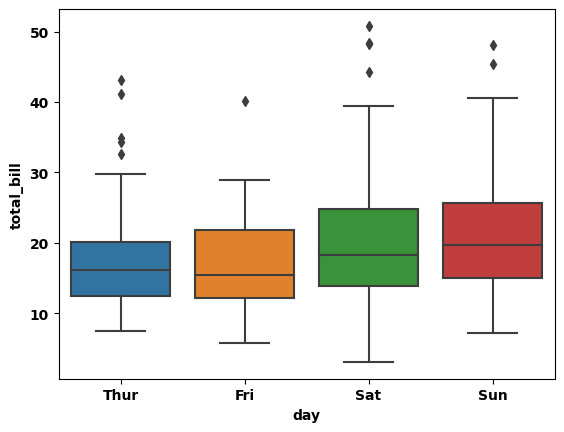

In [22]:
sns.boxplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

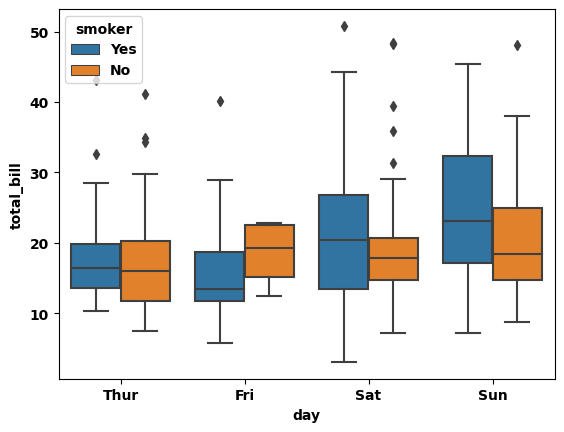

In [23]:
sns.boxplot(x='day', y='total_bill', data=tips, hue="smoker") # smoker based catagorization

# Violinplot
Violinplot is a `graph` close to the box plot but it shows the distribution of a `numerical` variable by a `kernel density estimation` approximation.

<Axes: xlabel='day', ylabel='total_bill'>

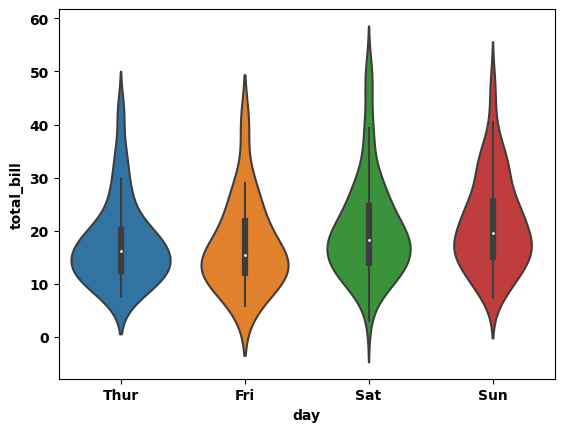

In [24]:
sns.violinplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

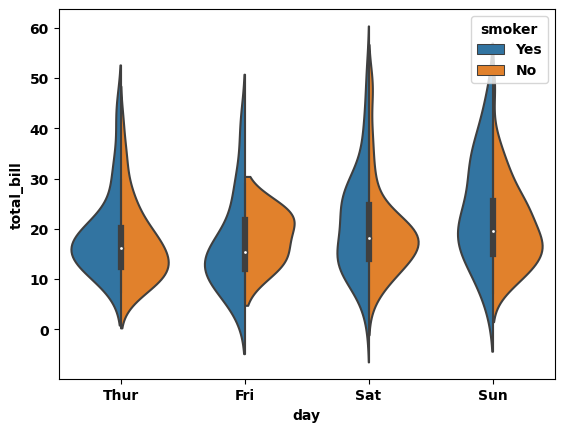

In [25]:
sns.violinplot (x='day', y='total_bill', data=tips, hue='smoker', split=True)
# catgorization of the total bills by day and smoker. The smoker is catagorized as 0 and 1 and the smoker catagorization is marged togather which gives a lot of information

# Stripplot

<Axes: xlabel='day', ylabel='total_bill'>

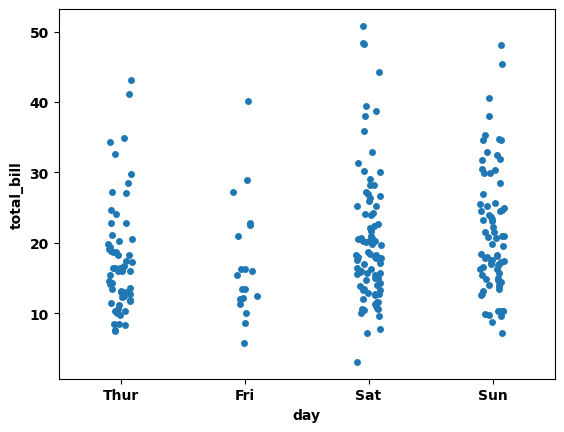

In [26]:
sns.stripplot(x='day', y='total_bill', data=tips,)

<Axes: xlabel='day', ylabel='total_bill'>

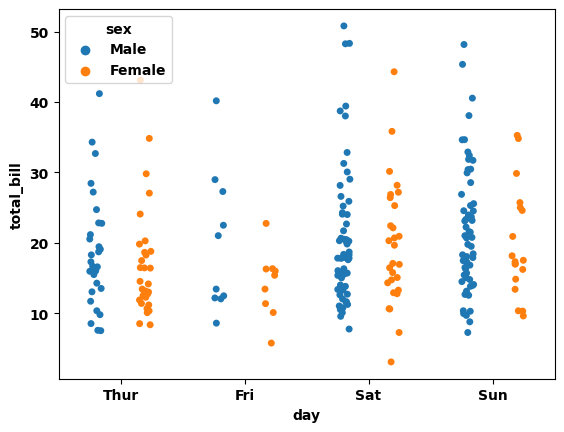

In [27]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True) # dodge make the hue catagorization split, so we can see the catagorization clearly/

# Swarmplot
Combine a `stripplot` and a `violinplot` to get a `swarmplot`. It shows the `distribution` of a `numerical` variable for different `categories`. It is a `categorical` equivalent of a `kdeplot`.

<Axes: xlabel='day', ylabel='total_bill'>

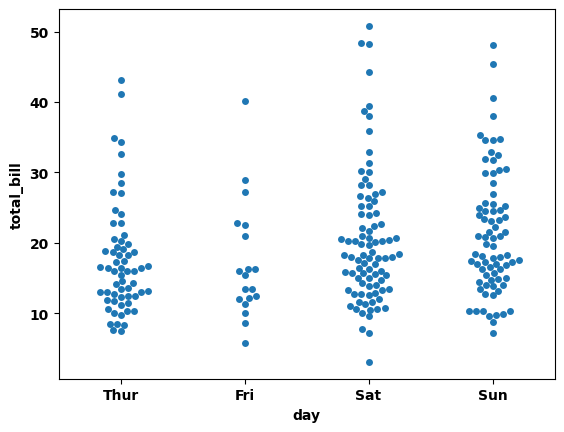

In [28]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

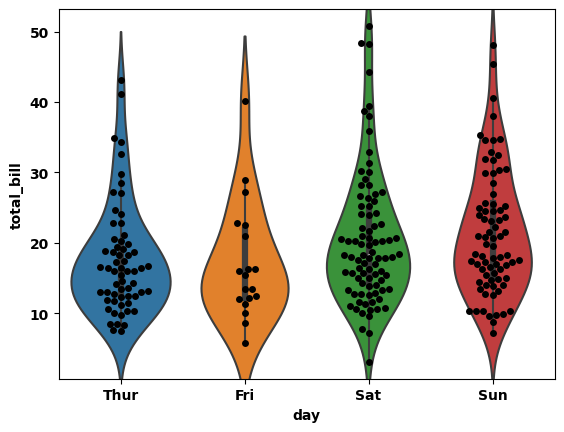

In [29]:
# similarity between the two catagorizations
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

There is a plot called `factorplot` which is a `general` plot that can be used to draw `categorical` plots. It can be used to draw `barplots`, `countplots`, `boxplots`, `violinplots`, `swarmplots`, etc. It is a `general` plot that can be used to draw `categorical` plots.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


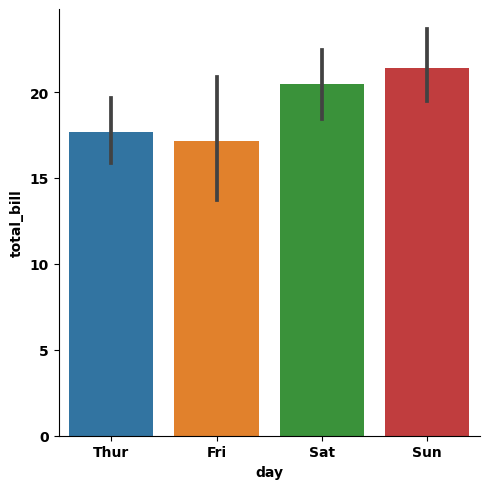

In [30]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


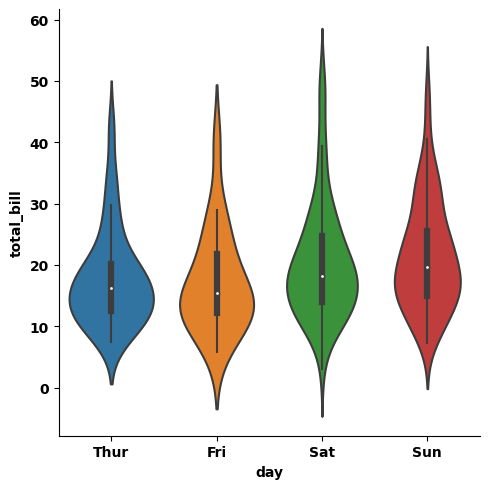

In [31]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

# Matrix plots

In [32]:
# setting up the datasets for the Matrix plot
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# HEATMAP
A `heatmap` is a `2D` representation of a `matrix` where the `individual` values are represented as `colors`. It is used to visualize the `correlation` between `numerical` variables.

For example we can use the `correlation` between the `numerical` variables in the `tips` dataset to get a `heatmap`. By `correletion` i mean the `ratio` of `change` between two `variables`. For example if `variable` `A` increases by `10%` and `variable` `B` increases by `20%` then the `correlation` between `A` and `B` is `2`.

In [34]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [35]:
tc = tips.corr(numeric_only=True)

So if you look at the heat map below you can see that the `correlation` between `total_bill` and `tip` is `0.68`. Which means that if the `total_bill` increases by `10%` then the `tip` increases by `6.8%`. And the colors in the `heatmap` represent the `correlation` between the `variables`where the colors are maped to the `correlation` values. Here in this `heatmap` the `correlation` values are between `0` and `1` and the higher the `correletion` the `lighter` the `color`.

<Axes: >

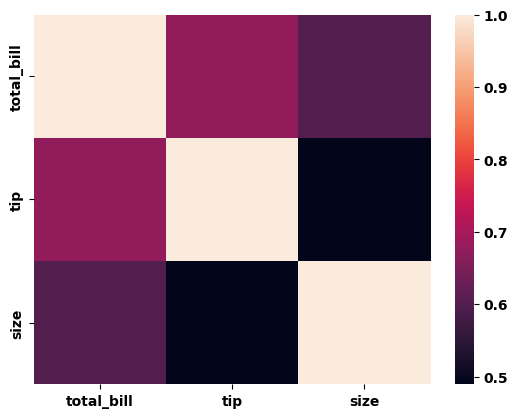

In [36]:
sns.heatmap(tc) # heatmap

<Axes: >

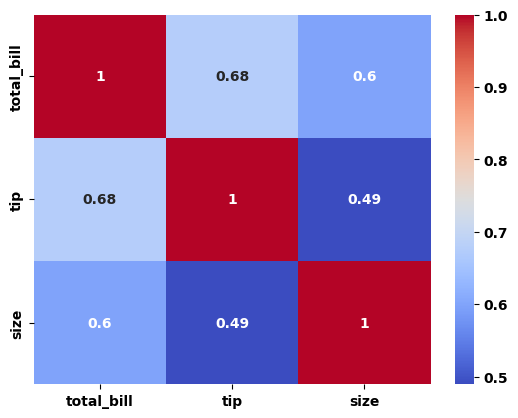

In [37]:
#we can change the color of the heatmap
sns.heatmap(tc, annot=True, cmap='coolwarm') #cmap is the color mapping argument and annot is the annotation argument where the numbers are displayed

In [38]:
#now lets have a lok at the flight data
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


another type of visualization would be pivot table heatmapping

In [39]:
flights.pivot_table(index='month',columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [40]:
tc = flights.pivot_table(index='month',columns='year', values='passengers')

<Axes: xlabel='year', ylabel='month'>

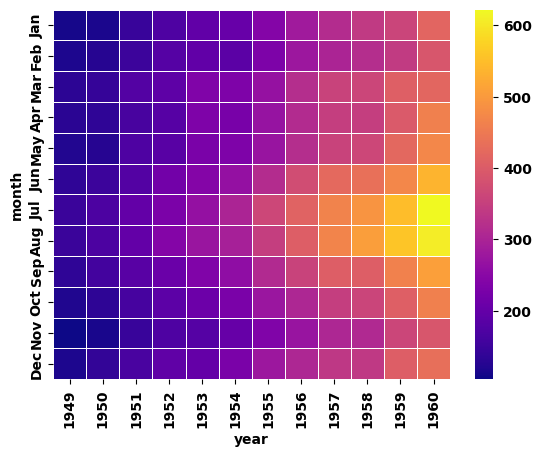

In [41]:
sns.heatmap(tc, cmap='plasma', linewidth=0.5, linecolor='white') #cmap is the color mapping argument and annot is the annotation argument where the numbers are displayed and linewidth is the width of the lines and linecolor is the color of the lines

# Clustermap

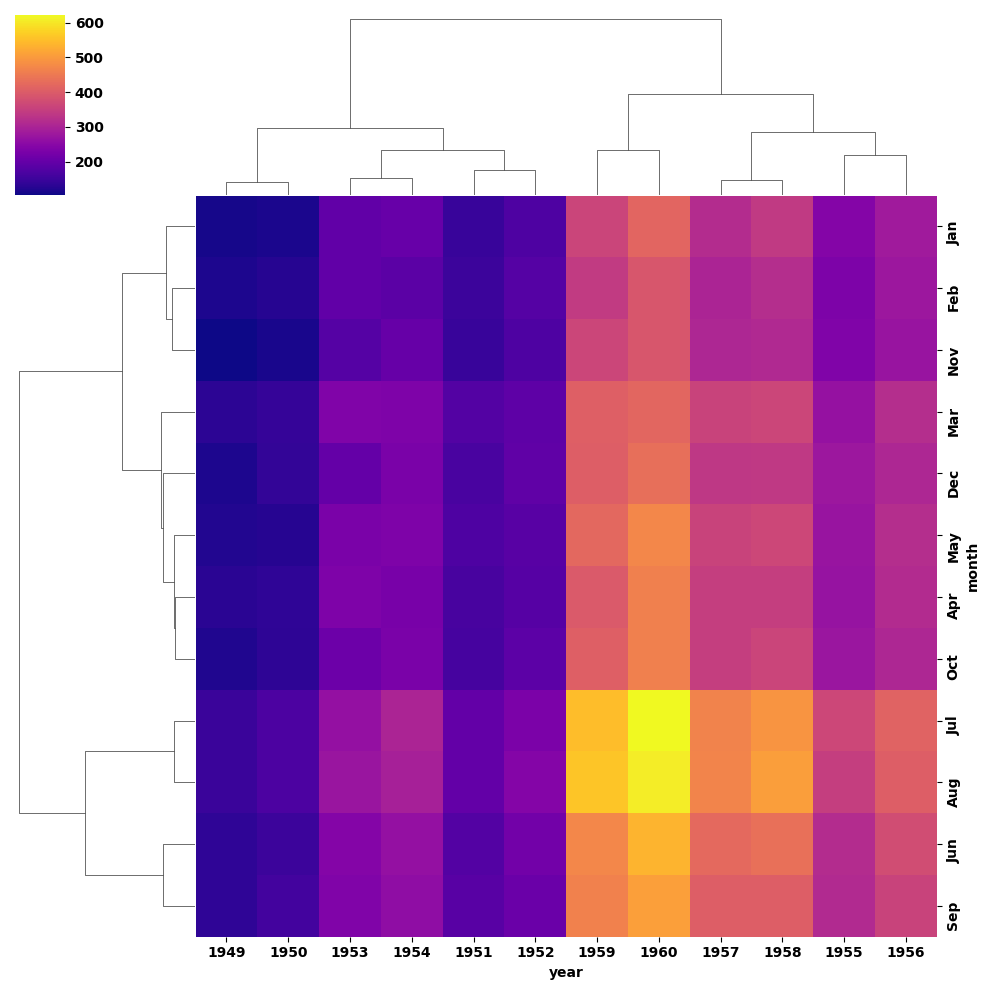

In [42]:
sns.clustermap(tc,cmap='plasma')

# grids

In [43]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


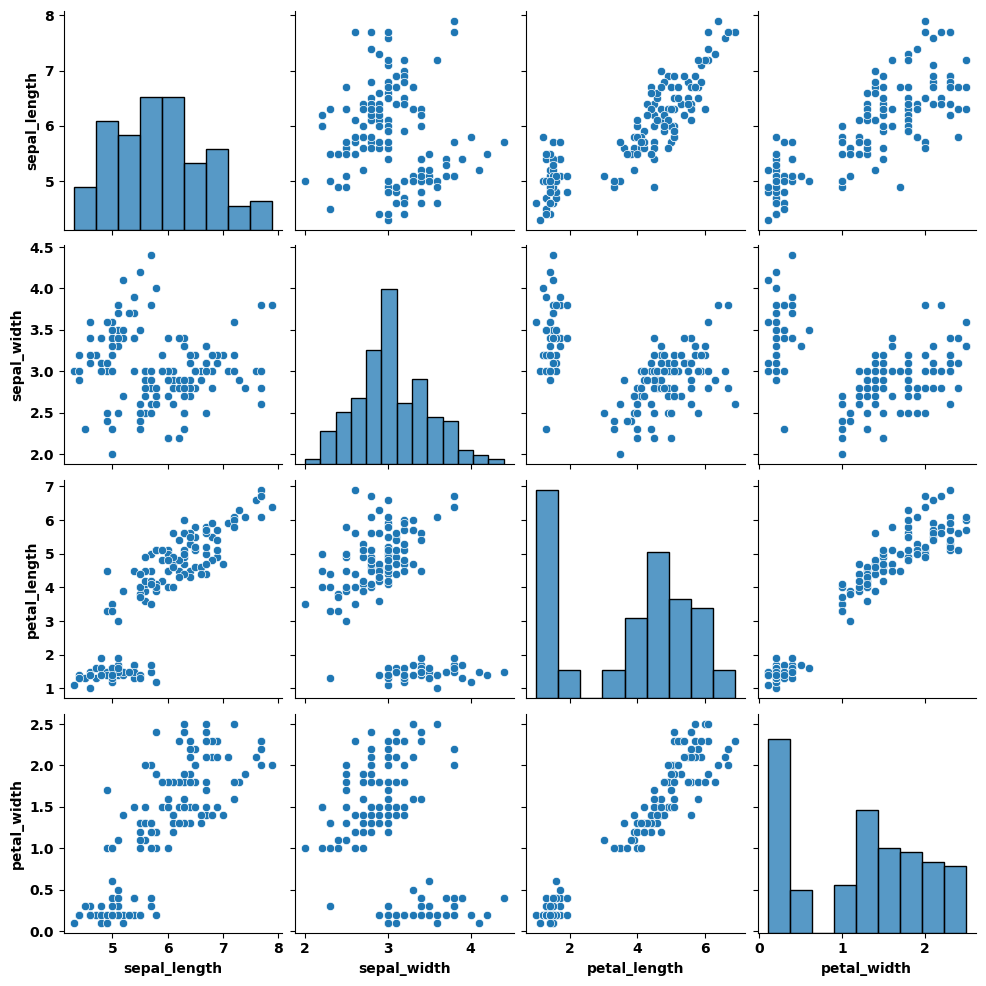

In [44]:
sns.pairplot(df)

the pairplot is a type of grid but the its limited to 2 to two types of plots 
- scatter plot
- histogram

we can use the `pairgrid` to get more types of plots in a single grid

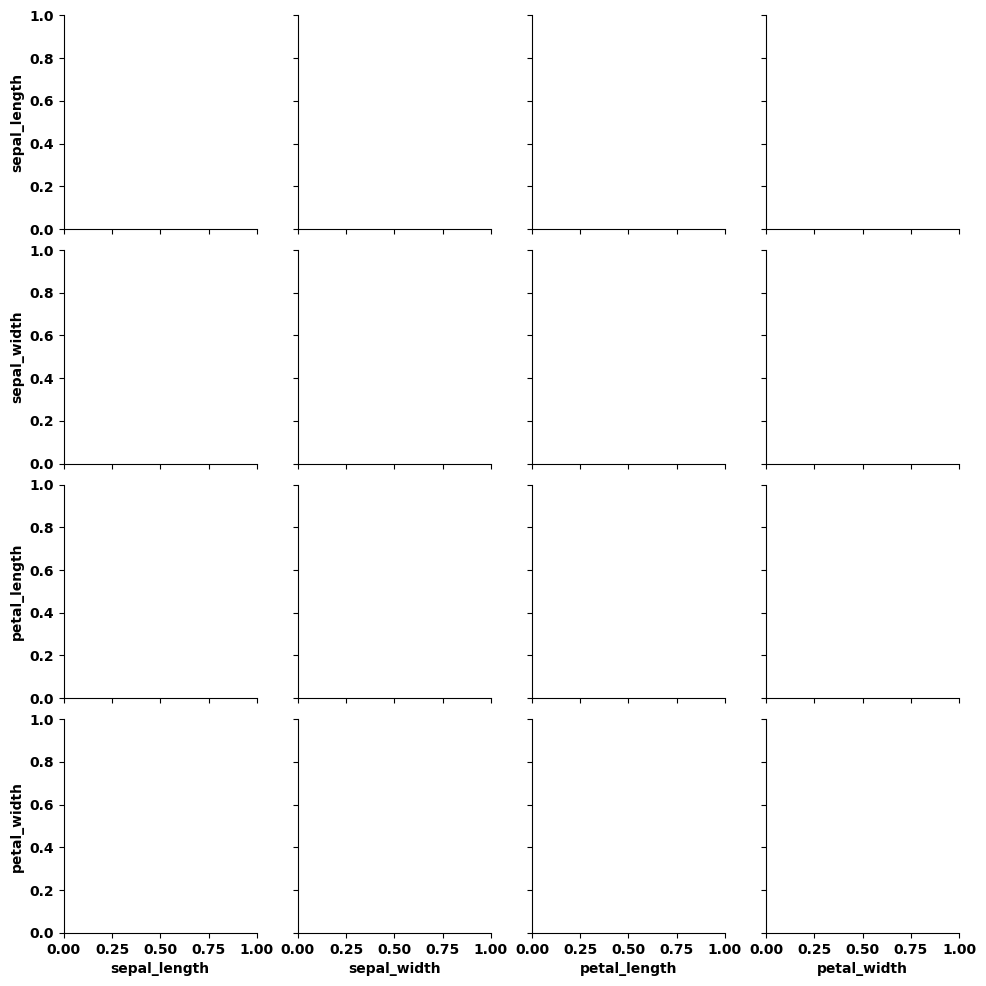

In [45]:
sns.PairGrid(df) #this will give us a empty grid

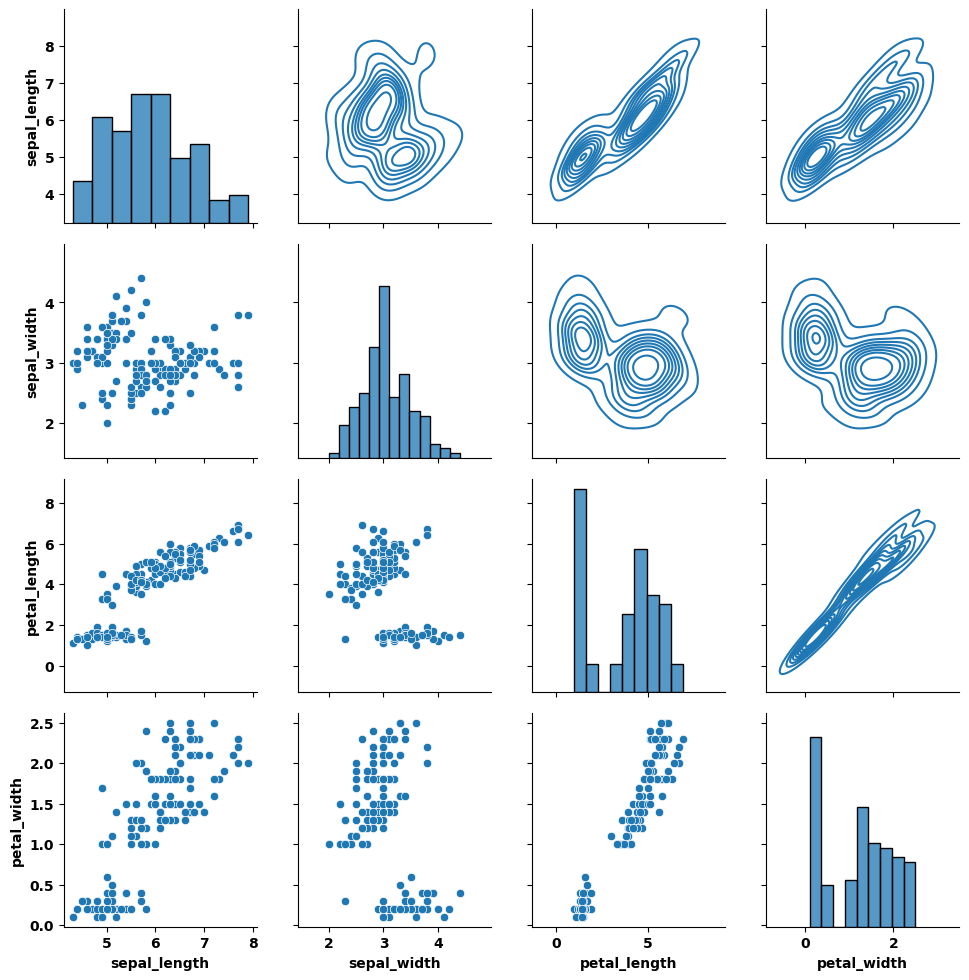

In [46]:
# so by using pairgrid we have various graphs
g = sns.PairGrid(df)
g.map_diag(sns.histplot) #map diagonal means the diagnoal plots of the pairplot 
g.map_lower(sns.scatterplot) #map lower means the lower plots
g.map_upper(sns.kdeplot) #map upper means the upper plots


# Facetgrid
it gives us a `general` grid that can be used to draw `categorical` plots. It can be used to draw `barplots`, `countplots`, `boxplots`, `violinplots`, `swarmplots`, etc. It is a `general` plot that can be used to draw `categorical` plots.

In [47]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


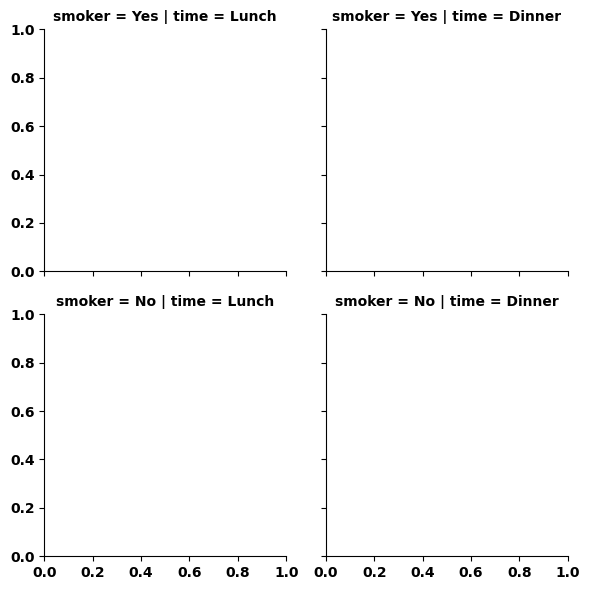

In [48]:
sns.FacetGrid(df, col='time', row='smoker') # this will give us an empty grid

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


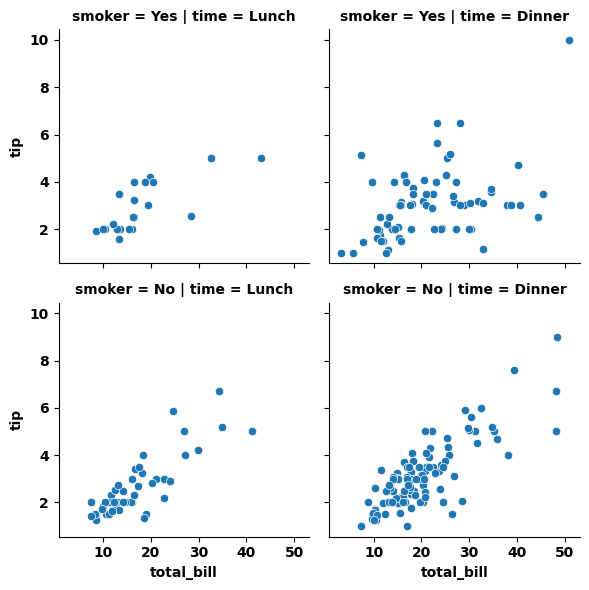

In [49]:
#we can plot by doing the following
g = sns.FacetGrid(df, col='time', row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip') # this will give us a scatter plot


c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


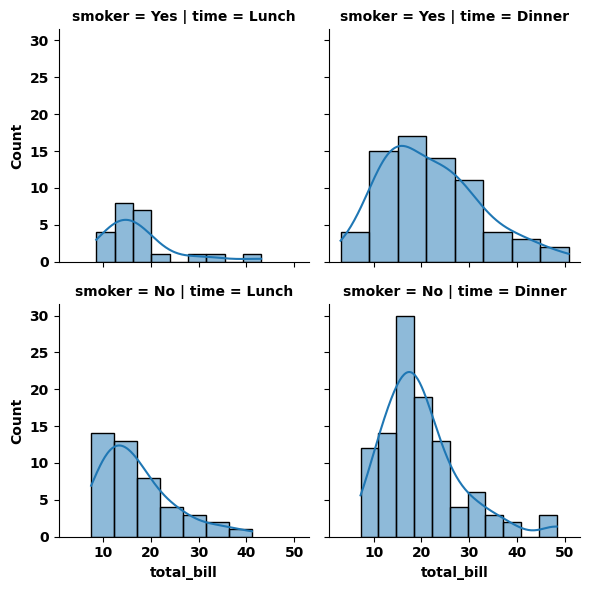

In [50]:
#we can plot by doing the following
g = sns.FacetGrid(df, col='time', row='smoker')
g.map(sns.histplot, 'total_bill',kde=True) # this will give us a scatter plot

# Regression Plot

In [51]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#  Lmplot

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


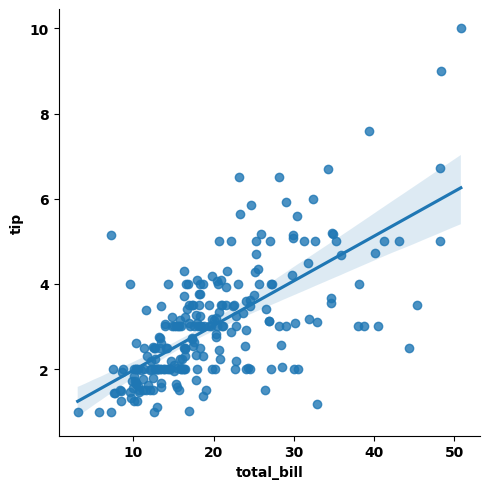

In [52]:
sns.lmplot(x='total_bill',y='tip',data=tips) # this will give us a scatter plot with a regression line

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


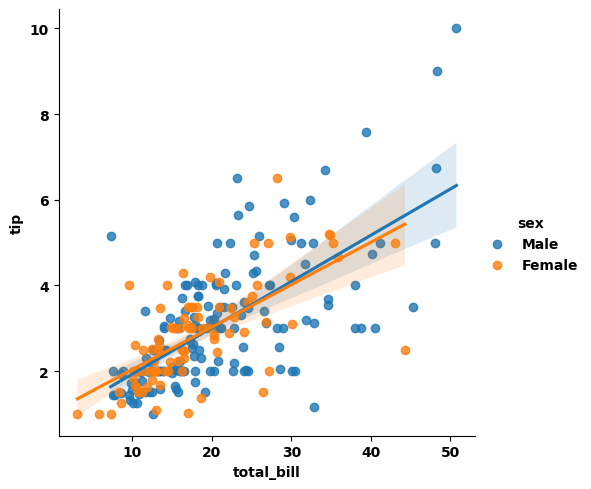

In [53]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex') # this will give us a scatter plot with a regression line and catagorization of the total bills by sex

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


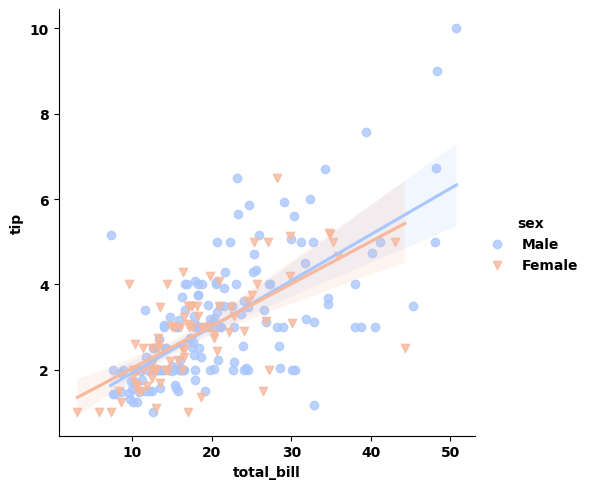

In [54]:
#we can also do some stylling by doing the following
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette='coolwarm', markers=['o','v']) # this will give us a scatter plot with a regression line and catagorization of the total bills by sex and color mapping

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


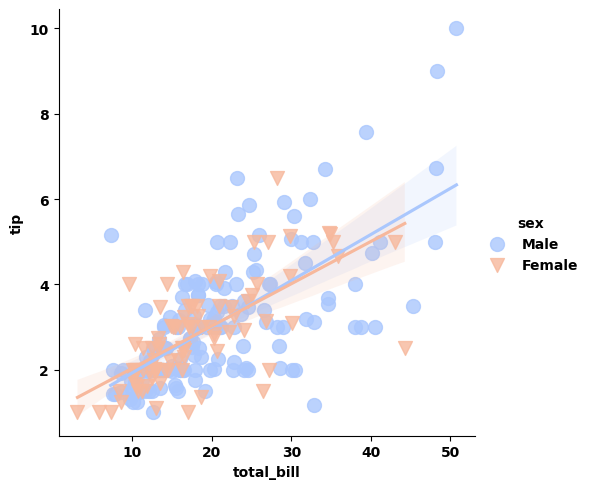

In [55]:
# what seaborn is doing is calling matplotlib.pyplot under the hood to plot the regression line
# this gives us some more customization
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette='coolwarm', markers=['o','v'], scatter_kws={'s':100}) # kws is the keyword arguments and scatter_kws is the keyword arguments for the scatter plot which is the size of the points

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


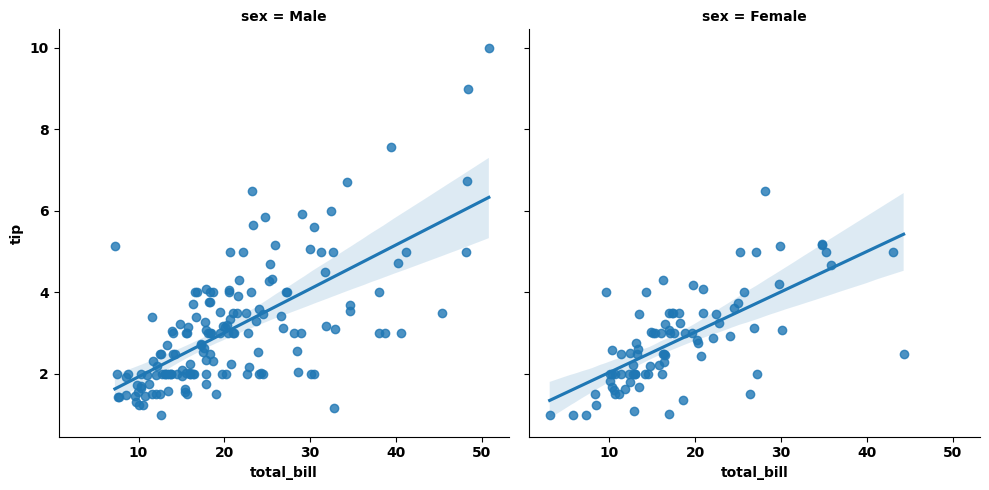

In [56]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex') # this will give us a scatter plot with a regression line and catagorization of the total bills by sex

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


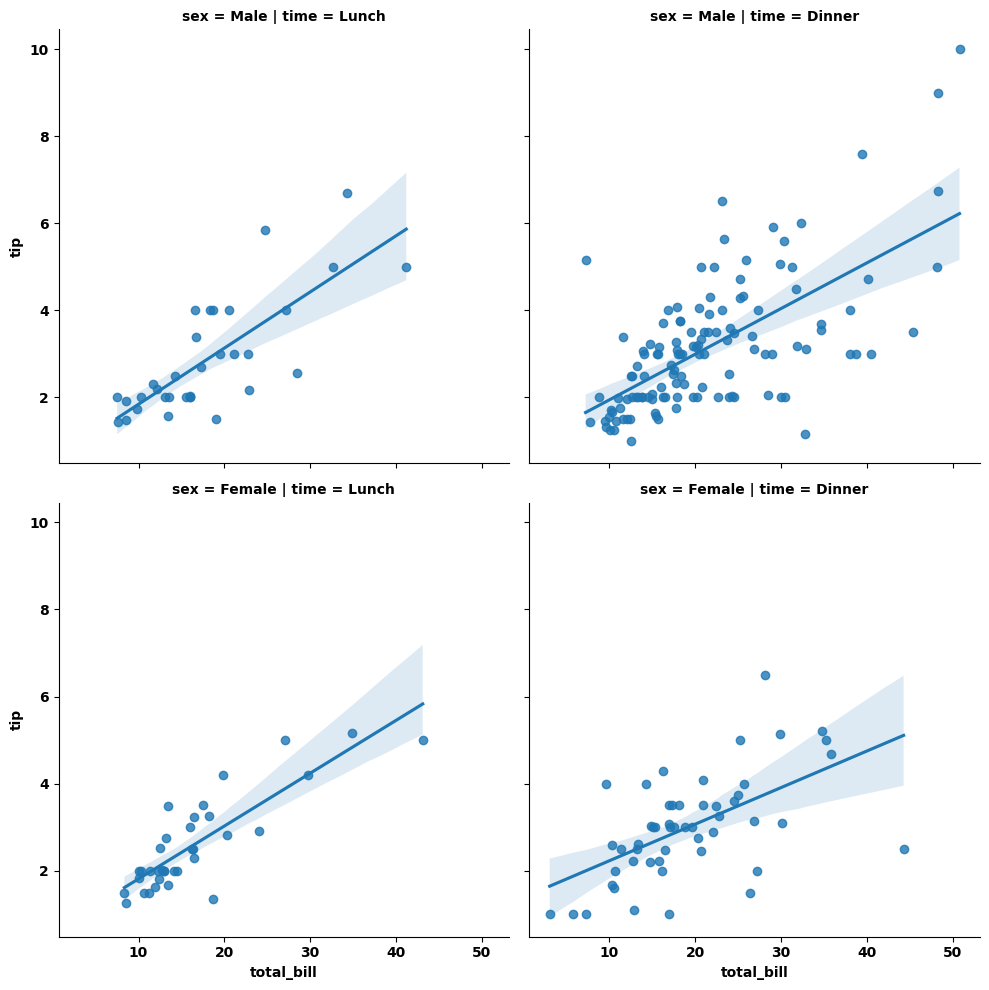

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips, row='sex', col='time') # this will give us a scatter plot with a regression line and catagorization of the total bills by sex

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


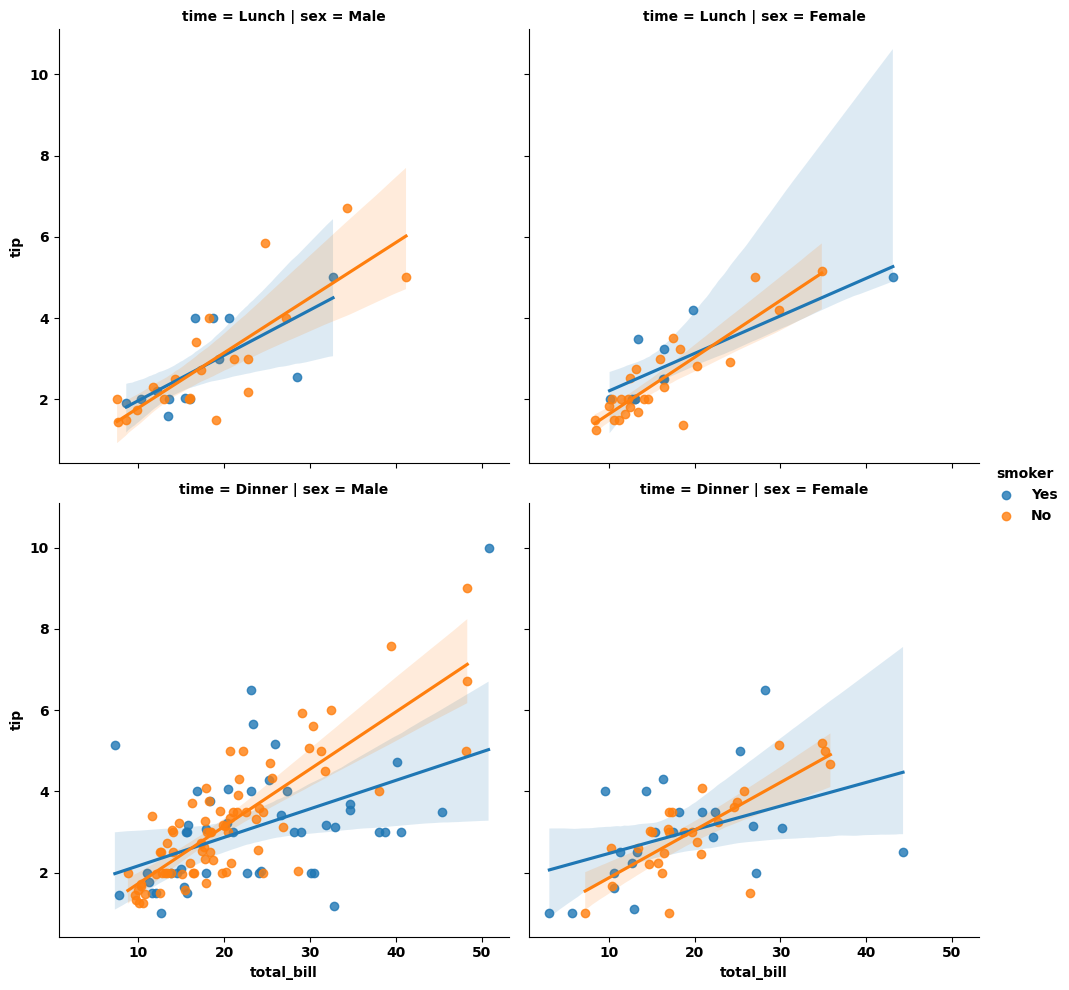

In [58]:
#we can also do this 
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex', row='time', hue='smoker') # this will give us a scatter plot with a regression line and catagorization of the total bills by sex and time

# there is a huge problem with this kind of plots its giving us too much information and its hard to understand what is going on

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


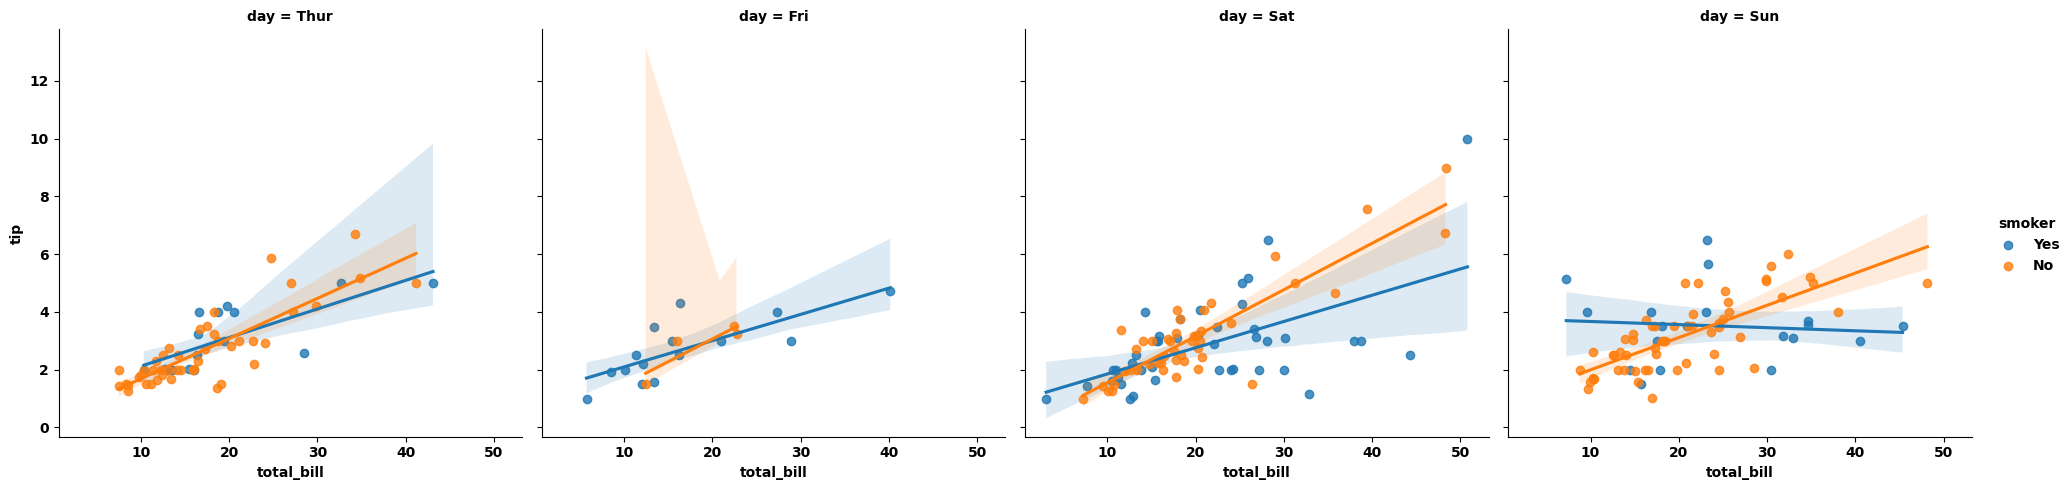

In [59]:
# so we can modify the plot
sns.lmplot(data=tips, x='total_bill',y='tip', hue='smoker', col='day') # this will give us a scatter plot with a regression line and catagorization of the total bills by sex and time

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


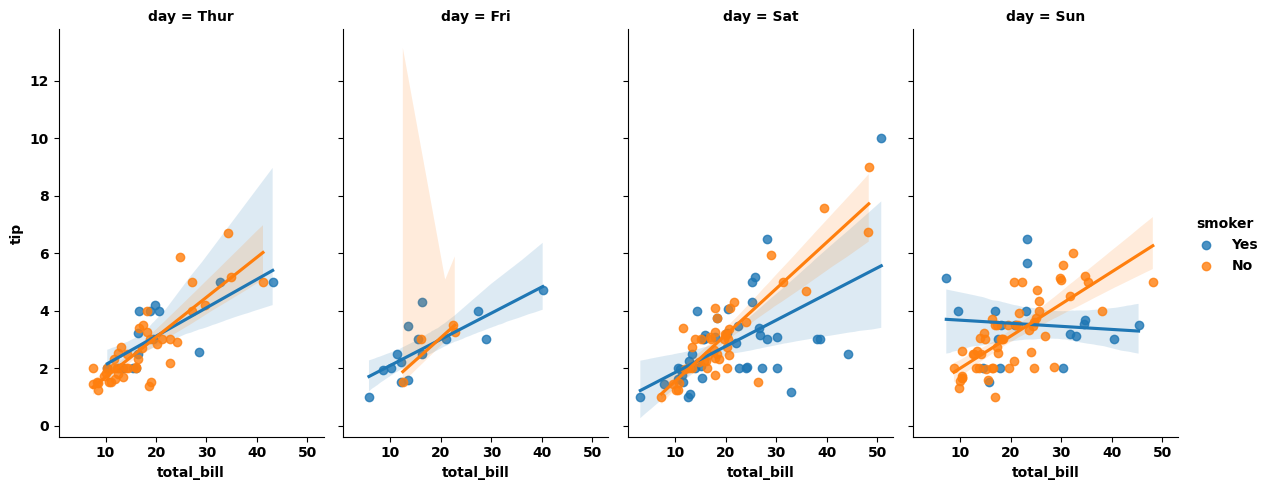

In [60]:
# its giving us 4 plots in one line so we can change the aspect of the plot
sns.lmplot(data=tips, x='total_bill',y='tip', hue='smoker', col='day', aspect=0.6)

# set stytle

<Axes: xlabel='smoker', ylabel='count'>

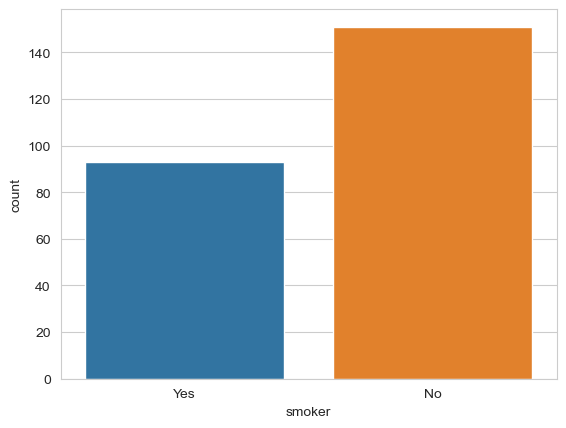

In [61]:
sns.set_style("whitegrid") #this will change the style of the plot
# you can also add the following as argument
# sns.set_style("ticks")
# sns.set_style("dark")
# sns.set_style("darkgrid")
# sns.set_style("white")
# sns.set_style("whitegrid")
sns.countplot(data=tips, x = "smoker")   
                  

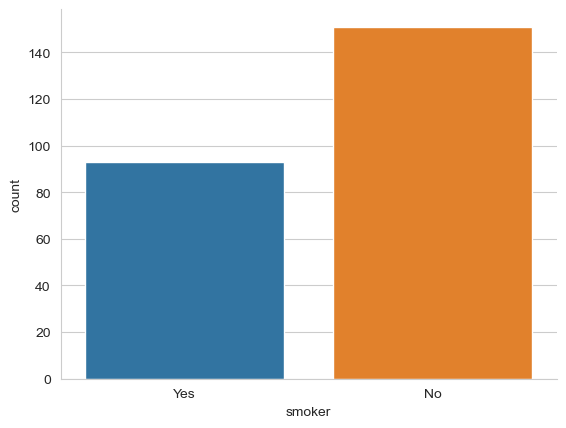

In [62]:
sns.countplot(data=tips, x = "smoker")   
sns.despine() # this will remove the spines from the plot
# you can also add the following as argument
# sns.despine(left=True)
# sns.despine(bottom=True)


## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<Axes: xlabel='sex', ylabel='count'>

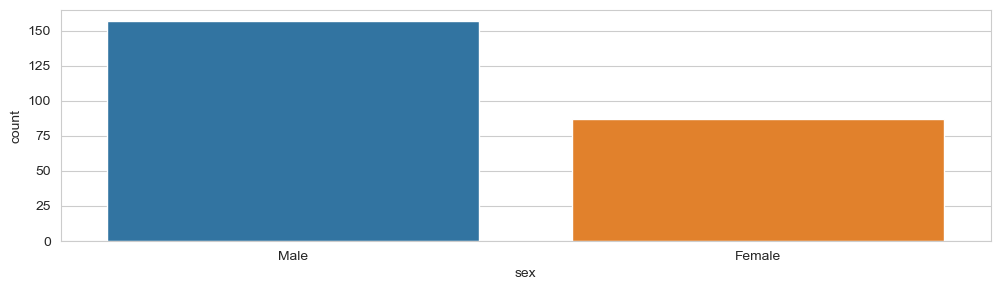

In [63]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


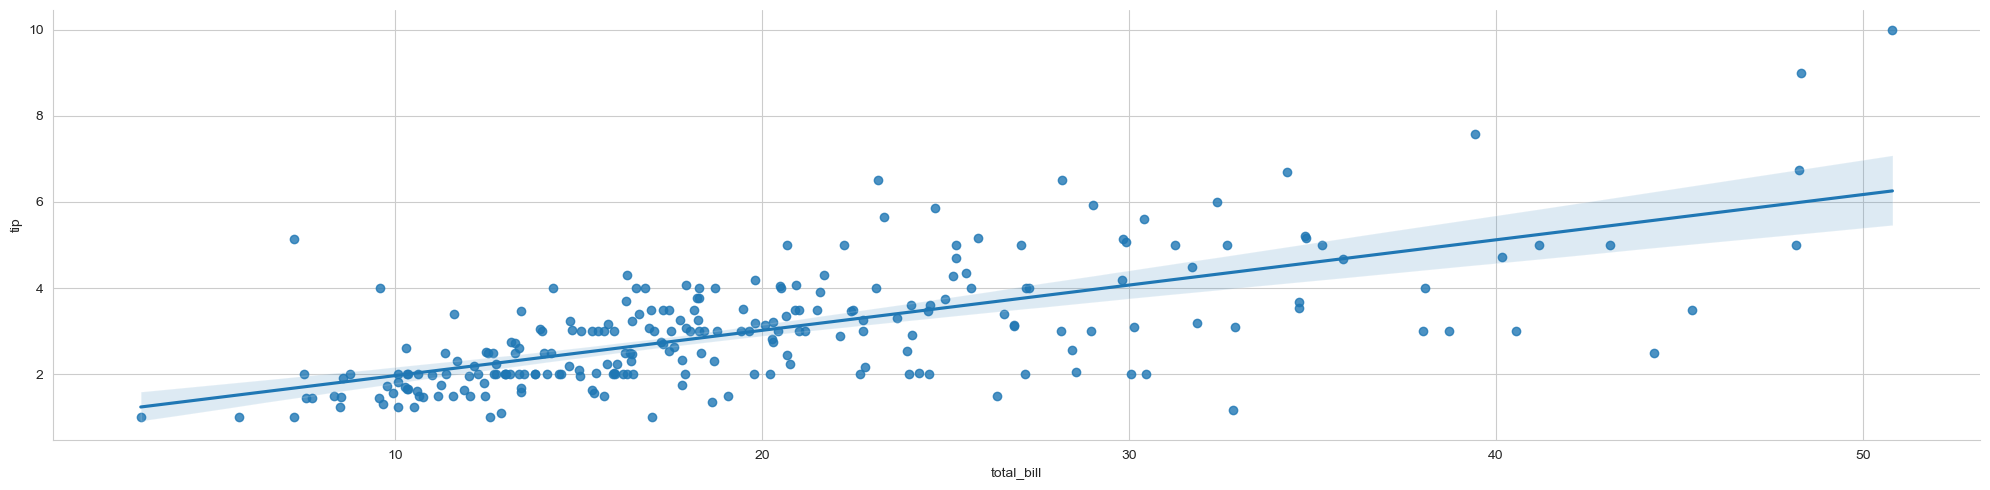

In [64]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

<Axes: xlabel='sex', ylabel='count'>

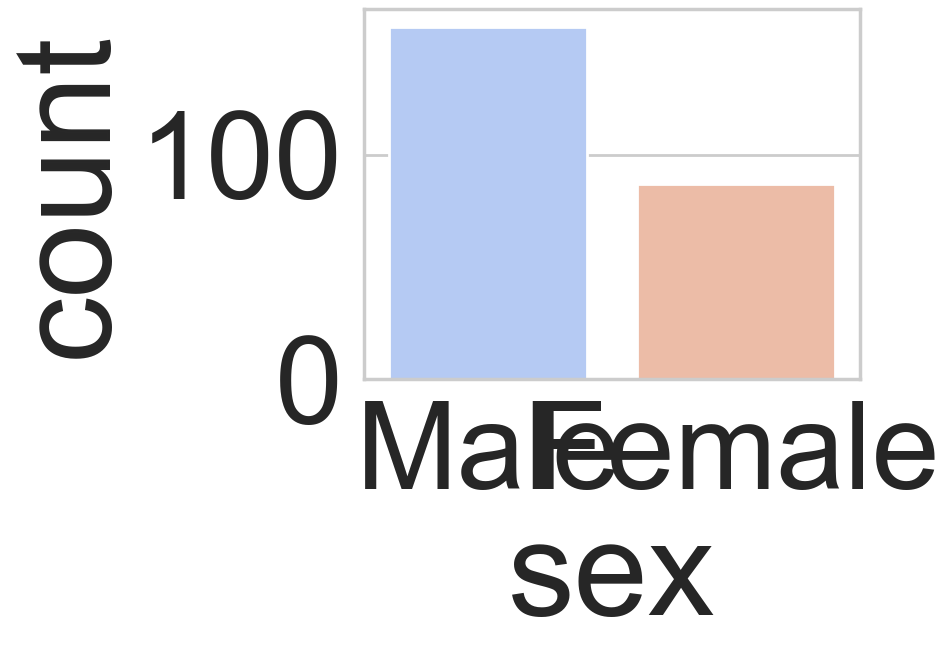

In [65]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html

# Congo!!